# 1. Introduccion
### En este cuaderno vamos a practicar haciendo dos redes neuronales convolucionales a dos dataset de imágenes:
* https://www.kaggle.com/datasets/stealthknight/bird-vs-drone/data (clasificación binaria)
* https://www.kaggle.com/datasets/imsparsh/flowers-dataset/data (clasificación multiclase)

# 2. Clasificación Binaria (Bird VS Drone)

## 2.1 Importamos el dataset

In [96]:
import kagglehub
import os

# Descargar el dataset desde KaggleHub
print("Descargando el dataset Bird vs Drone...")
path = kagglehub.dataset_download("stealthknight/bird-vs-drone")
print("Dataset descargado en:", path)

Descargando el dataset Bird vs Drone...
Dataset descargado en: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1


In [97]:
import os

# Mostrar la estructura de directorios
print("Estructura del directorio:")
for root, dirs, files in os.walk(path):
    print(f"\nCarpeta: {root}")
    for file in files[5:]:
        print(f"  - {file}")

Estructura del directorio:

Carpeta: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1

Carpeta: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset

Carpeta: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\test

Carpeta: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\test\images
  - BT (103).jpg
  - BT (104).jpg
  - BT (105).jpg
  - BT (106).jpg
  - BT (107).jpg
  - BT (108).jpg
  - BT (109).jpg
  - BT (11).jpg
  - BT (110).jpg
  - BT (111).jpg
  - BT (112).jpg
  - BT (113).jpg
  - BT (114).jpg
  - BT (115).jpg
  - BT (116).jpg
  - BT (117).jpg
  - BT (118).jpg
  - BT (119).jpg
  - BT (12).jpg
  - BT (120).jpg
  - BT (121).jpg
  - BT (122).jpg
  - BT (123).jpg
  - BT (124).jpg
  - BT (125).jpg
  - BT (126).jpg
  - BT (127).jpg
  - BT (128).jpg
  - BT (129).jpg
  - BT (13).jpg
  - BT (130).jpg
  - BT (131).jpg
  - BT (132).jpg
  - BT (133).j

### dataset está organizado de esta manera (ejemplo):
* BTR (para las imagenes de pajaros training)
* DTR (para las imagenes de drones training)
* BV (para las imagenes de pajaros validacion)
* DV (para las imagenes de drones validacion)
* DT (para las imagenes de drones test)
* BT (para las imagenes de pájaros test)

In [98]:
print("Ruta base del dataset descargado:", path)

Ruta base del dataset descargado: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1


## 2.2 Definimos las rutas de la carpetas

In [99]:
import os

# Construir rutas dinámicamente basadas en la ruta descargada
train_images_path = os.path.join(path, "Dataset", "train", "images")
valid_images_path = os.path.join(path, "Dataset", "valid", "images")
test_images_path = os.path.join(path, "Dataset", "test", "images")

# Verificar las rutas
print("Ruta de entrenamiento:", train_images_path)
print("Ruta de validación:", valid_images_path)
print("Ruta de prueba:", test_images_path)

Ruta de entrenamiento: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\train\images
Ruta de validación: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\valid\images
Ruta de prueba: C:\Users\domid\.cache\kagglehub\datasets\stealthknight\bird-vs-drone\versions\1\Dataset\test\images


## 2.3 Obtenemos y contamos imágenes por clase

In [100]:
from glob import glob
from collections import Counter

# Obtener listas de imágenes
train_images = glob(os.path.join(train_images_path, "*.jpg"))
valid_images = glob(os.path.join(valid_images_path, "*.jpg"))
test_images = glob(os.path.join(test_images_path, "*.jpg"))
# Verificar las primeras imágenes para asegurarnos de que las rutas y nombres son correctos
print("Primeras imágenes de entrenamiento:")
print(train_images[:5])  # Mostrar las primeras 5 imágenes de entrenamiento
print("Primeras imágenes de validación:")
print(valid_images[:5])  # Mostrar las primeras 5 imágenes de validación
print("Primeras imágenes de test:")
print(test_images[:5])  # Mostrar las primeras 5 imágenes de test

# Función para asignar etiquetas según el nombre del archivo
def asignar_etiqueta(imagen):
    if 'BTR' in imagen:  # Pájaro en entrenamiento
        return 'pajaro'
    elif 'DTR' in imagen:  # Dron en entrenamiento
        return 'dron'
    elif 'BV' in imagen:  # Pájaro en validación
        return 'pajaro'
    elif 'DV' in imagen:  # Dron en validación
        return 'dron'
    elif 'BT' in imagen:  # Pájaro en test
        return 'pajaro'
    elif 'DT' in imagen:  # Dron en test
        return 'dron'
    else:
        return None  # Eliminamos cualquier archivo sin etiqueta válida

# Asignar etiquetas
train_labels = [asignar_etiqueta(img) for img in train_images]
valid_labels = [asignar_etiqueta(img) for img in valid_images]
test_labels = [asignar_etiqueta(img) for img in test_images]

# Eliminar cualquier imagen que no haya sido etiquetada correctamente
train_images = [img for img, label in zip(train_images, train_labels) if label is not None]
train_labels = [label for label in train_labels if label is not None]
test_images = [img for img, label in zip(test_images, test_labels) if label is not None]
test_labels = [label for label in test_labels if label is not None]

valid_images = [img for img, label in zip(valid_images, valid_labels) if label is not None]
valid_labels = [label for label in valid_labels if label is not None]

# Contar la cantidad de imágenes por clase
contador_train = Counter(train_labels)
contador_valid = Counter(valid_labels)
contador_test = Counter(test_labels)

# Verificar la cantidad de imágenes por clase
print("Cantidad de imágenes por clase (Entrenamiento):", contador_train)
print("Cantidad de imágenes por clase (Validación):", contador_valid)
print("Cantidad de imágenes por clase (Test):", contador_test)

Primeras imágenes de entrenamiento:
['C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (1).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (10).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (100).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (1000).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\train\\images\\BTR (1001).jpg']
Primeras imágenes de validación:
['C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\valid\\images\\BV (1).jpg', 'C:\\Users\\domid\\.cache\\kagglehub\\datasets\\stealthknight\\bird-vs-drone\\versions\\1\\Dataset\\valid\\images\\BV (10).jpg', 'C:\\Users\\domid\

## 2.4 Mostramos algunas imágenes aleatorias de entrenamiento y validación

Imágenes de Dron (entrenamiento): 10934
Imágenes de Pájaro (entrenamiento): 7389
Imágenes de Dron (validación): 1039
Imágenes de Pájaro (validación): 701
Imágenes de Dron (prueba): 528
Imágenes de Pájaro (prueba): 361


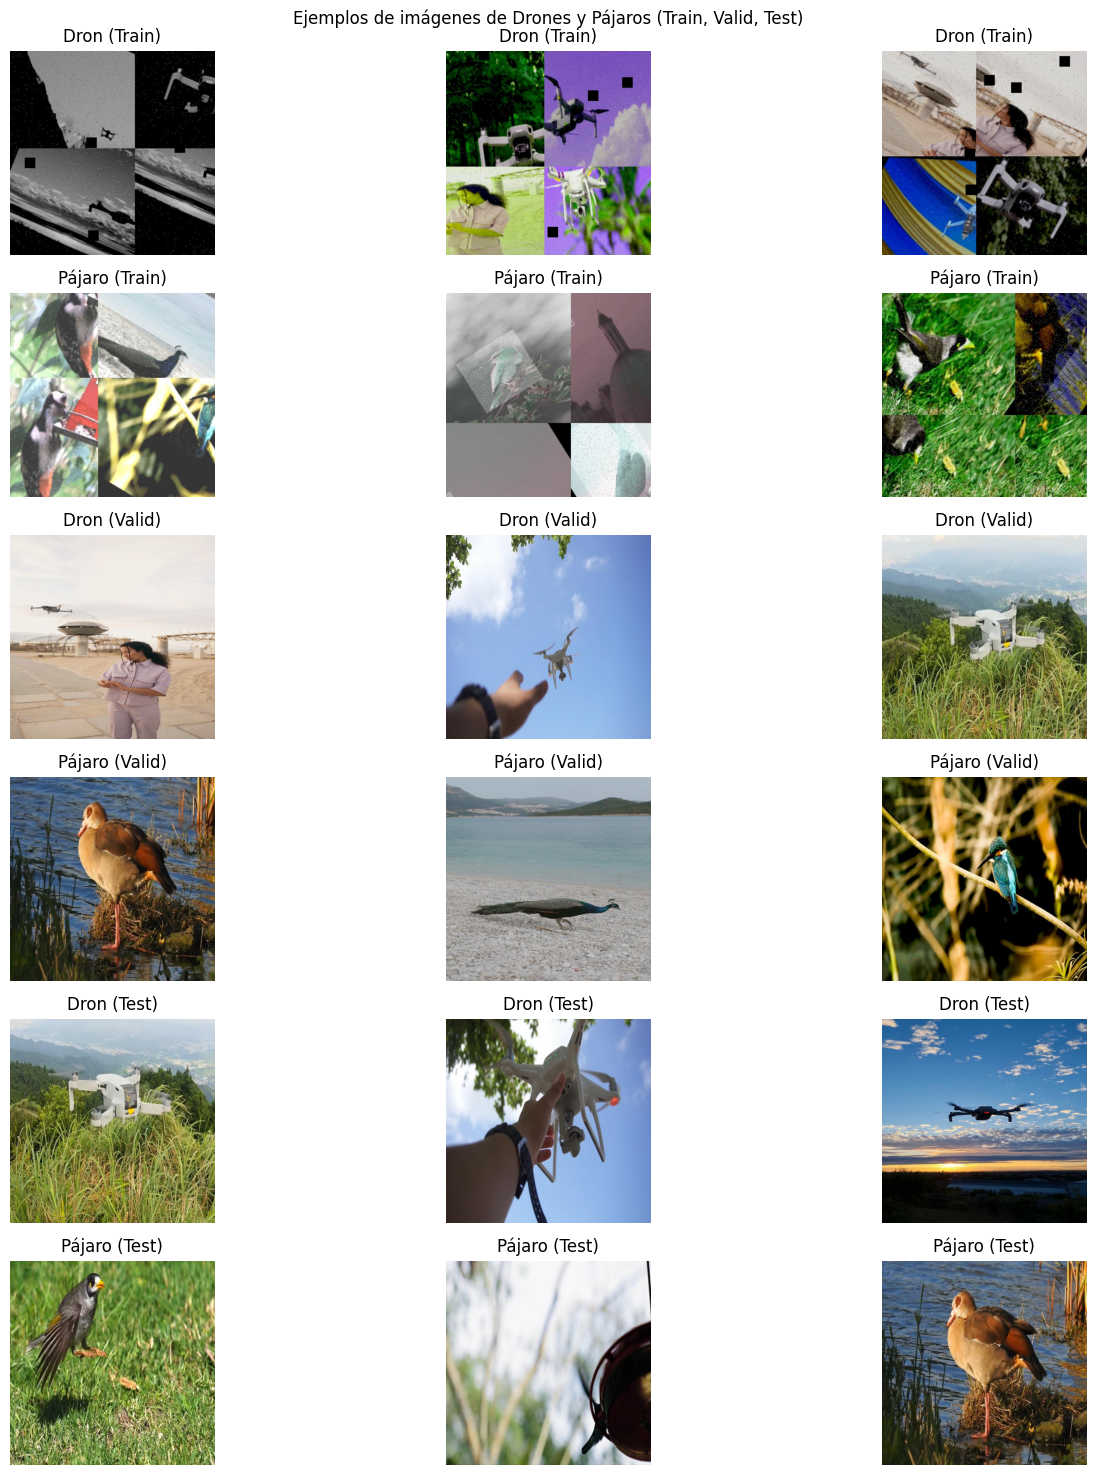

In [101]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Función para mostrar imágenes de cada clase (dron y pájaro) de entrenamiento, validación y prueba
def mostrar_imagenes_por_clase(imagenes_train, etiquetas_train, imagenes_valid, etiquetas_valid, imagenes_test, etiquetas_test, n=3):
    # Filtrar imágenes de cada clase en entrenamiento
    drones_train = [img for img, etiqueta in zip(imagenes_train, etiquetas_train) if etiqueta == 'dron']
    pajaros_train = [img for img, etiqueta in zip(imagenes_train, etiquetas_train) if etiqueta == 'pajaro']

    # Filtrar imágenes de cada clase en validación
    drones_valid = [img for img, etiqueta in zip(imagenes_valid, etiquetas_valid) if etiqueta == 'dron']
    pajaros_valid = [img for img, etiqueta in zip(imagenes_valid, etiquetas_valid) if etiqueta == 'pajaro']

    # Filtrar imágenes de cada clase en prueba
    drones_test = [img for img, etiqueta in zip(imagenes_test, etiquetas_test) if etiqueta == 'dron']
    pajaros_test = [img for img, etiqueta in zip(imagenes_test, etiquetas_test) if etiqueta == 'pajaro']

    # Mostrar cuántas imágenes hay de cada clase
    print(f"Imágenes de Dron (entrenamiento): {len(drones_train)}")
    print(f"Imágenes de Pájaro (entrenamiento): {len(pajaros_train)}")
    print(f"Imágenes de Dron (validación): {len(drones_valid)}")
    print(f"Imágenes de Pájaro (validación): {len(pajaros_valid)}")
    print(f"Imágenes de Dron (prueba): {len(drones_test)}")
    print(f"Imágenes de Pájaro (prueba): {len(pajaros_test)}")

    # Seleccionar imágenes aleatorias
    seleccion_drones_train = random.sample(drones_train, min(len(drones_train), n))
    seleccion_pajaros_train = random.sample(pajaros_train, min(len(pajaros_train), n))
    seleccion_drones_valid = random.sample(drones_valid, min(len(drones_valid), n))
    seleccion_pajaros_valid = random.sample(pajaros_valid, min(len(pajaros_valid), n))
    seleccion_drones_test = random.sample(drones_test, min(len(drones_test), n))
    seleccion_pajaros_test = random.sample(pajaros_test, min(len(pajaros_test), n))

    # Mostrar las imágenes
    plt.figure(figsize=(15, 15))

    # Imágenes de entrenamiento
    for i, img_path in enumerate(seleccion_drones_train):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 1)
        plt.imshow(img)
        plt.title(f"Dron (Train)")
        plt.axis('off')

    for i, img_path in enumerate(seleccion_pajaros_train):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + n + 1)
        plt.imshow(img)
        plt.title(f"Pájaro (Train)")
        plt.axis('off')

    # Imágenes de validación
    for i, img_path in enumerate(seleccion_drones_valid):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 2 * n + 1)
        plt.imshow(img)
        plt.title(f"Dron (Valid)")
        plt.axis('off')

    for i, img_path in enumerate(seleccion_pajaros_valid):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 3 * n + 1)
        plt.imshow(img)
        plt.title(f"Pájaro (Valid)")
        plt.axis('off')

    # Imágenes de prueba
    for i, img_path in enumerate(seleccion_drones_test):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 4 * n + 1)
        plt.imshow(img)
        plt.title(f"Dron (Test)")
        plt.axis('off')

    for i, img_path in enumerate(seleccion_pajaros_test):
        img = mpimg.imread(img_path)
        plt.subplot(6, n, i + 5 * n + 1)
        plt.imshow(img)
        plt.title(f"Pájaro (Test)")
        plt.axis('off')

    plt.suptitle(f"Ejemplos de imágenes de Drones y Pájaros (Train, Valid, Test)")
    plt.tight_layout()
    plt.show()

# Mostrar 3 imágenes de cada clase en los tres conjuntos
mostrar_imagenes_por_clase(train_images, train_labels, valid_images, valid_labels, test_images, test_labels, n=3)

## 2.5 Modelo de Red Neuronal Convolucional (CNN)

### 2.5.1 Carga y preprocesamiento de las imágenes de prueba

In [102]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Función para cargar y preprocesar las imágenes (en color y redimensionadas)
def cargar_imagenes_color(lista_imagenes, img_size=(224, 224)):
    imagenes = []
    for img_path in lista_imagenes:
        img = image.load_img(img_path, target_size=img_size, color_mode='rgb')  # Mantener las imágenes en color (RGB)
        img_array = image.img_to_array(img)  # Convertir imagen a array de numpy
        imagenes.append(img_array)
    return np.array(imagenes)

# Cargar las imágenes de entrenamiento, validación y prueba en color
train_images_array = cargar_imagenes_color(train_images)
valid_images_array = cargar_imagenes_color(valid_images)
test_images_array = cargar_imagenes_color(test_images)

# Normalizar las imágenes (los valores de píxeles deben estar entre 0 y 1)
train_images_array = train_images_array / 255.0
valid_images_array = valid_images_array / 255.0
test_images_array = test_images_array / 255.0

# Convertir las imágenes a tipo float32
train_images_array = train_images_array.astype('float32')
valid_images_array = valid_images_array.astype('float32')
test_images_array = test_images_array.astype('float32')

# Convertir las etiquetas de texto a números (dron = 1, pajaro = 0)
def convertir_etiquetas(etiquetas):
    return [1 if etiqueta == 'dron' else 0 for etiqueta in etiquetas]

# Convertir las etiquetas de texto a números
train_labels_num = convertir_etiquetas(train_labels)
valid_labels_num = convertir_etiquetas(valid_labels)
test_labels_num = convertir_etiquetas(test_labels)

# Asegurarse de que las etiquetas estén en formato numérico (0 o 1)
train_labels_num = np.array(train_labels_num, dtype=np.int32)
valid_labels_num = np.array(valid_labels_num, dtype=np.int32)
test_labels_num = np.array(test_labels_num, dtype=np.int32)

# Barajar las imágenes y etiquetas de entrenamiento juntas
indices = np.arange(len(train_images_array))
np.random.shuffle(indices)
train_images_array = train_images_array[indices]
train_labels_num = train_labels_num[indices]

# Verificar el tamaño de las imágenes cargadas
print(f'Tamaño de las imágenes de entrenamiento: {train_images_array.shape}')
print(f'Tamaño de las imágenes de validación: {valid_images_array.shape}')
print(f'Tamaño de las imágenes de prueba: {test_images_array.shape}')

Tamaño de las imágenes de entrenamiento: (18323, 224, 224, 3)
Tamaño de las imágenes de validación: (1740, 224, 224, 3)
Tamaño de las imágenes de prueba: (889, 224, 224, 3)


### 2.5.2 Definimos el modelo

In [103]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Crear el modelo de red neuronal convolucional
modelo = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),  # Usar BinaryCrossentropy para clasificación binaria
    metrics=['accuracy']
)

# Resumen del modelo para verificar la estructura
modelo.summary()

c:\Users\domid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,631,169 (21.48 MB)

 Trainable params: 5,631,169 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

### Dado que los datos de entrenamiento estar desbalanceados entre las clases (dron y pájaro), es una buena práctica calcular los pesos de las clases antes de entrenar el modelo. Esto ayudará al modelo a no sesgarse hacia la clase mayoritaria.

In [104]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calcular los pesos de las clases
class_weights = compute_class_weight(
    class_weight='balanced',  # Ajustar los pesos de forma balanceada
    classes=np.unique(train_labels_num),  # Clases únicas (0 para pájaro, 1 para dron)
    y=train_labels_num  # Etiquetas de entrenamiento
)

# Convertir a un diccionario
class_weights = dict(enumerate(class_weights))
print("Pesos de las clases:", class_weights)

Pesos de las clases: {0: np.float64(1.2398836107727704), 1: np.float64(0.8378909822571794)}


### 2.5.3 Entrenamiento del modelo

In [ ]:
# Entrenar el modelo
historial = modelo.fit(
    train_images_array, 
    train_labels_num,  # Usar etiquetas numéricas (0 o 1)
    epochs=10,  # Número de épocas
    batch_size=64,  # Tamaño del batch
    validation_data=(valid_images_array, valid_labels_num),  # Usar las etiquetas numéricas de validación
    class_weight=class_weights  # Usar los pesos de las clases
)

Epoch 1/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 192s 660ms/step - accuracy: 0.8510 - loss: 0.3185 - val_accuracy: 0.5103 - val_loss: 1.3593
Epoch 2/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 179s 624ms/step - accuracy: 0.9774 - loss: 0.0554 - val_accuracy: 0.4046 - val_loss: 2.8030
Epoch 3/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 179s 623ms/step - accuracy: 0.9947 - loss: 0.0141 - val_accuracy: 0.4029 - val_loss: 4.2322
Epoch 4/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.9962 - loss: 0.0070

### 2.5.4 Evaluación del modelo

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo.evaluate(test_images_array, test_labels_num, verbose=2)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

28/28 - 0s - 16ms/step - accuracy: 0.4173 - loss: 6.1652
Pérdida en el conjunto de prueba: 6.165218830108643
Precisión en el conjunto de prueba: 0.4173228442668915


### 2.5.5 Visualizamos el rendimiento (Perdida y precision) y matriz de confusión

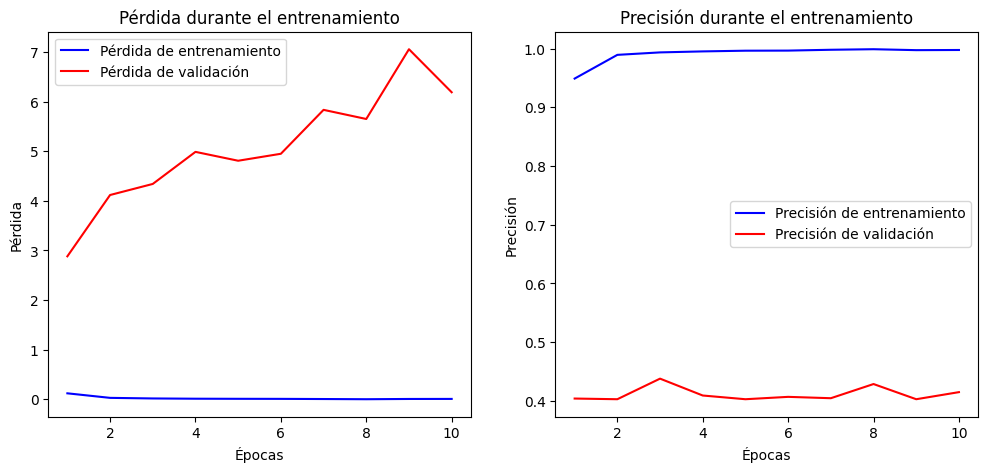

In [ ]:
import matplotlib.pyplot as plt

# Obtener el rango de épocas
epochs = range(1, len(historial.history['loss']) + 1)

# Crear la figura con subgráficas
plt.figure(figsize=(12, 5))

# Gráfica de Pérdida
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primera posición
plt.plot(epochs, historial.history['loss'], 'b', label='Pérdida de entrenamiento')
plt.plot(epochs, historial.history['val_loss'], 'r', label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

# Gráfica de Precisión
plt.subplot(1, 2, 2)  # Segunda posición
plt.plot(epochs, historial.history['accuracy'], 'b', label='Precisión de entrenamiento')
plt.plot(epochs, historial.history['val_accuracy'], 'r', label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

# Mostrar las gráficas
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar predicciones del modelo
predicciones = modelo.predict(test_images_array)
predicciones_binarias = (predicciones > 0.5).astype(int)  # Convertir a etiquetas binarias (0 o 1)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(test_labels_num, predicciones_binarias)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Pájaro', 'Dron'], yticklabels=['Pájaro', 'Dron'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

# 3. transfer learning

### 3.1 Implementar el modelo preentrenado

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.applications.efficientnet import preprocess_input

# Cargar el modelo preentrenado EfficientNetB0 sin la capa superior (top)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base para preservar los pesos preentrenados
base_model.trainable = False

# Construir el modelo
modelo_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Reducir las dimensiones espaciales
    layers.Dense(128, activation='relu'),  # Capa densa para aprender características específicas
    layers.Dropout(0.5),  # Regularización para evitar sobreajuste
    layers.Dense(1, activation='sigmoid')  # Salida binaria (dron o pájaro)
])

# Compilar el modelo
modelo_transfer.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
modelo_transfer.summary()

### 3.2 Preprocesar las imágenes

In [ ]:
# Preprocesar las imágenes
train_images_array = preprocess_input(train_images_array)
valid_images_array = preprocess_input(valid_images_array)
test_images_array = preprocess_input(test_images_array)

### 3.3 Entrenar el modelo

In [ ]:
# Entrenar el modelo
historial_transfer = modelo_transfer.fit(
    train_images_array,
    train_labels_num,
    epochs=10,
    batch_size=64,
    validation_data=(valid_images_array, valid_labels_num),
    class_weight=class_weights  # Usar pesos de clases si están desbalanceadas
)

### 3.4 Evaluar el modelo

In [ ]:
test_loss, test_accuracy = modelo_transfer.evaluate(test_images_array, test_labels_num, verbose=2)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

In [ ]:
# Generar predicciones del modelo
predicciones = modelo_transfer.predict(test_images_array)
predicciones_binarias = (predicciones > 0.5).astype(int)  # Convertir a etiquetas binarias (0 o 1)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(test_labels_num, predicciones_binarias)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Pájaro', 'Dron'], yticklabels=['Pájaro', 'Dron'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()